In [1]:
%pip install datascience

# imports
from datascience import *
import os
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

Note: you may need to restart the kernel to use updated packages.


In [2]:
data: dict[str, Table] = {}

for dir_name, _, file_names in os.walk("./music/"):
    for file in file_names:
        if file.endswith(".csv"):
            file_name = file[:-4]
            data[file_name] = Table.read_table(f"{dir_name}/{file}")

print(data)

{'(7) Inception': name                   | url                                       | album                                                 | date       | artist      | genre             | popularity | danceability | energy | key  | loudness | mode | speechiness | acousticness | instrumentalness | liveness | valence | tempo   | duration_ms | time_signature
Half Remembered Dream  | Inception (Music from the Motion Picture) | https://open.spotify.com/track/7DU7DNVDZouvJ34tPcPxBj | 2010-07-09 | Hans Zimmer | german soundtrack | 47         | 0.134        | 0.112  | 7    | -27.401  | 1    | 0.044       | 0.352        | 0.447            | 0.146    | 0.0479  | 81.224  | 71956       | 3
We Built Our Own World | Inception (Music from the Motion Picture) | https://open.spotify.com/track/1VCBfWtJOGPV3mtGw8mSlW | 2010-07-09 | Hans Zimmer | german soundtrack | 46         | 0.283        | 0.0707 | 7    | -28.994  | 0    | 0.0386      | 0.0519       | 0.884            | 0.657    | 0.0421  | 62.99   

In [3]:
explanatory_variables = [
    "danceability",
    "energy",
    "acousticness",
    "instrumentalness",
    "liveness",
    "valence",
    "mode",
    "tempo",
    "time_signature"
]

explanatory_variables_radar = [
    "danceability",
    "energy",
    "acousticness",
    "instrumentalness",
    "liveness",
    "valence",
    "mode"
]

In [17]:
top_30_movies = [playlist_name for playlist_name in data.keys() if playlist_name.startswith("(")]  # https://www.imdb.com/list/ls022753498/
lotr = ["Lord of The Rings (1)", "Lord of The Rings (2)", "Lord of The Rings (3)"]
httyd = ["HTTYD (1)", "HTTYD (2)", "HTTYD (3)"]
musicals = ["Fiddler on the Roof", "Something Rotten", "Cats (Musical)"]

In [5]:
def calculate_regression_line(x_axis, y_axis):
    su_x = (x_axis - np.mean(x_axis)) / np.std(x_axis)
    su_y = (y_axis - np.mean(y_axis)) / np.std(y_axis)

    r = np.mean(su_x * su_y)

    slope = (r * np.std(y_axis)) / np.std(x_axis)
    intercept = -slope * np.mean(x_axis) + np.mean(y_axis)

    return slope, intercept, r

In [6]:
def plot_for_playlist(playlist_name, pad = 5):
    for explanatory_variable in explanatory_variables:
        fig, ax = plt.subplots(figsize=(8, 4))

        playlist = data[playlist_name]

        x_axis = np.arange(playlist.num_rows)
        y_axis = playlist.column(explanatory_variable)

        ax.scatter(x_axis, y_axis, color=(39 / 255, 123 / 255, 219 / 255))

        # Slope Line
        slope, intercept, r = calculate_regression_line(x_axis, y_axis)
        ax.plot((-pad, x_axis[-1] + pad), (intercept + slope * -pad, intercept + slope * (x_axis[-1] + pad)), color=(64 / 255, 168 / 255, 50 / 255))

        ax.set_title(f"{explanatory_variable}, r = {r}")
        plt.show()

    
def plot_multiple_playlists(playlist_names, domain = 100, pad = 5, trans = 0.6):
    colours = list(mcolors.XKCD_COLORS)

    for explanatory_variable in explanatory_variables:
        fig, ax = plt.subplots(figsize=(8, 4))

        combined_x_axis = []
        combined_y_axis = []

        for playlist_index, playlist_name in enumerate(playlist_names):
            playlist = data[playlist_name]

            for index, value in enumerate(playlist.column(explanatory_variable)):
                combined_x_axis.append((index / (playlist.num_rows - 1)) * domain)
                combined_y_axis.append(value)

            random_index = int((playlist_index ** 7) * 6043327 / 57) % len(colours)
            ax.scatter(np.arange(playlist.num_rows) / (playlist.num_rows - 1) * domain, playlist.column(explanatory_variable), color=(*mcolors.to_rgb(mcolors.XKCD_COLORS[colours[random_index]]), trans))

        # Slope Line
        slope, intercept, r = calculate_regression_line(combined_x_axis, combined_y_axis)
        ax.plot((-pad, domain + pad), (intercept + slope * -pad, intercept + slope * (domain + pad)), color=(64 / 255, 168 / 255, 50 / 255))

        ax.set_title(f"{explanatory_variable}, r = {r}")
        plt.show()

In [7]:
def plot_hist_for_playlist(playlist_name, num_bins = 30):
    for explanatory_variable in explanatory_variables:
        fig, ax = plt.subplots(figsize=(8, 4))

        variable_data = data[playlist_name].column(explanatory_variable)
        mean = np.mean(variable_data)
        median = np.median(variable_data)

        ax.hist(variable_data, bins=num_bins)

        ax.plot([mean, mean], [0, 20], color=(0.8, 0.6, 0.4))  # Orange
        ax.plot([median, median], [0, 20], color=(0.4, 0.8, 0.4))  # Green

        ax.set_title(f"{playlist_name}: {explanatory_variable}")
        plt.show()


def plot_hist_for_multiple_playlists(playlist_names, num_bins = 30):
    for explanatory_variable in explanatory_variables:
        fig, ax = plt.subplots(figsize=(8, 4))
        
        combined_x_axis = []

        for playlist_index, playlist_name in enumerate(playlist_names):
            playlist = data[playlist_name]

            for value in playlist.column(explanatory_variable):
                combined_x_axis.append(value)

        ax.hist(combined_x_axis, bins=num_bins)

        ax.set_title(f"{explanatory_variable}")
        plt.show()

In [23]:
def plot_radar_for_playlist(playlist_name):
    fig, ax = plt.subplots(figsize=(8, 4), subplot_kw={"polar": True})
    
    angles = list(np.linspace(0, 2 * np.pi, len(explanatory_variables_radar), endpoint=False))
    angles.append(angles[0])

    r = []
    
    for explanatory_variable in explanatory_variables_radar:
        r.append(np.mean(data[playlist_name].column(explanatory_variable)))
    
    r.append(r[0])
    
    ax.plot(angles, r)

    ax.set_rmax(1)
    ax.set_rticks([0.5, 1])  # Less radial ticks

    plt.xticks(angles[:-1], explanatory_variables_radar, color='black', size=12)

    ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
    plt.show()

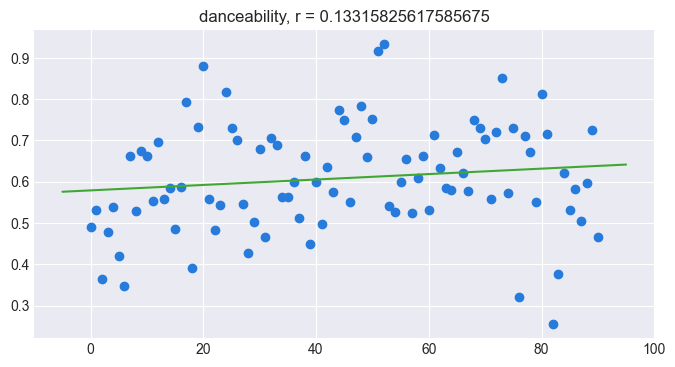

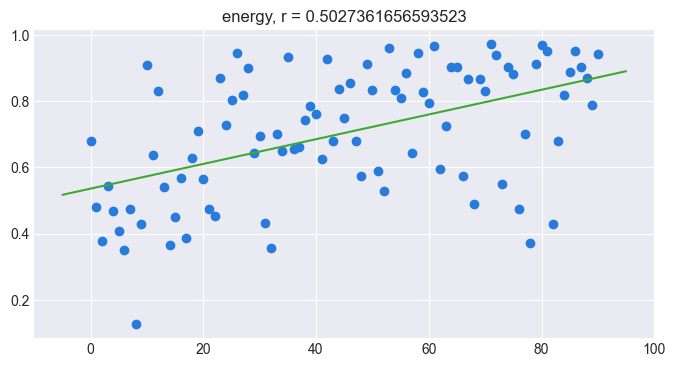

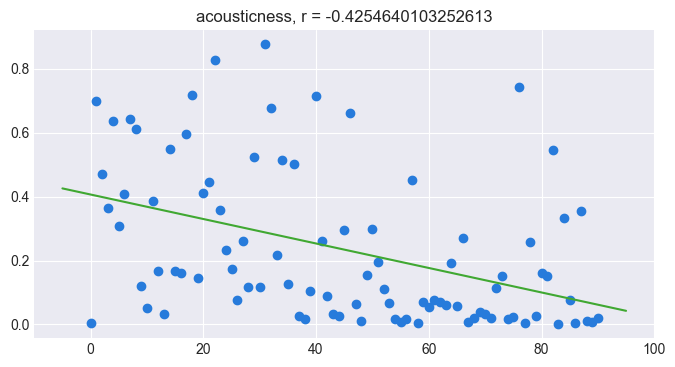

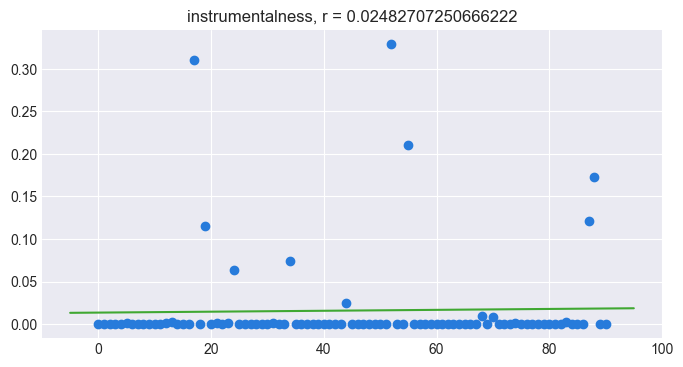

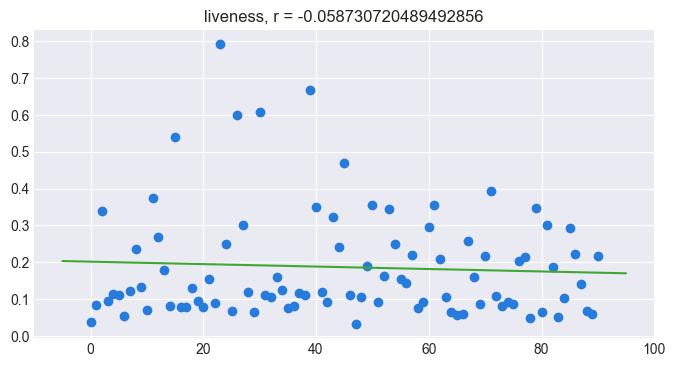

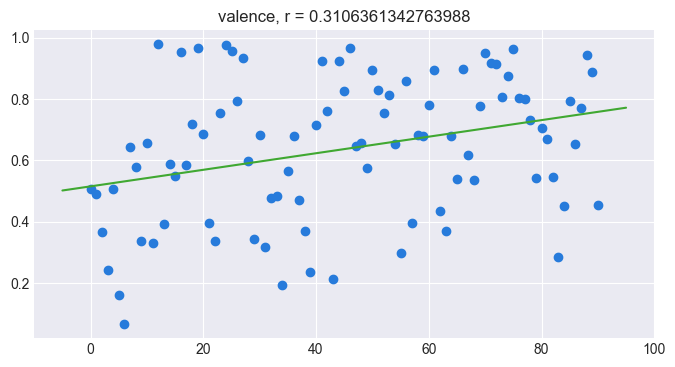

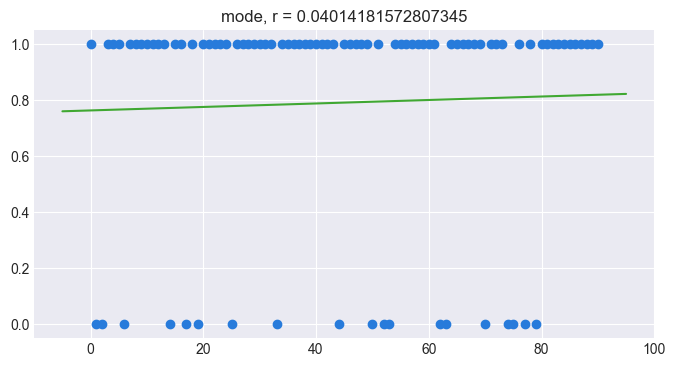

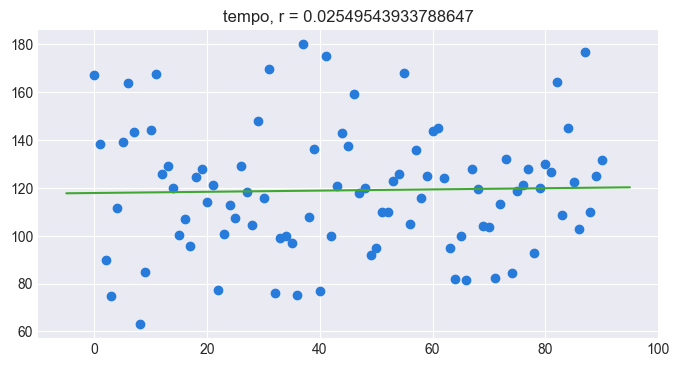

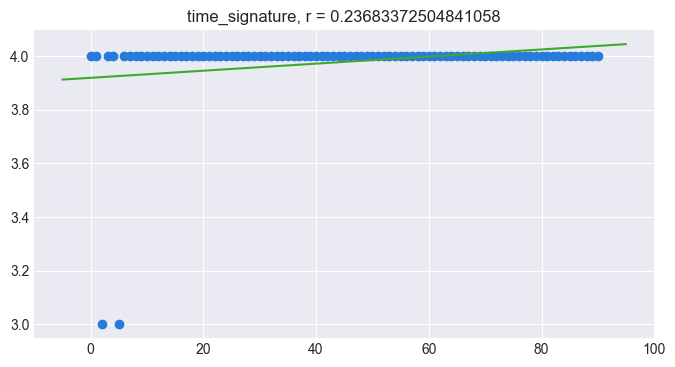

In [9]:
plot_for_playlist("My Playlist")

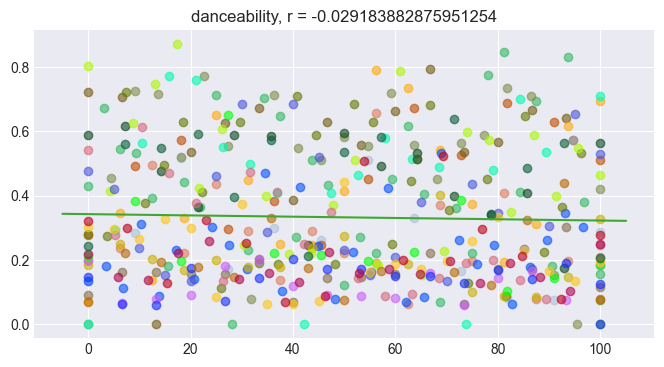

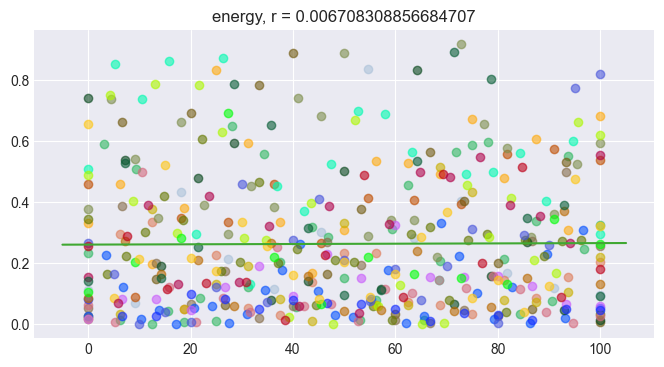

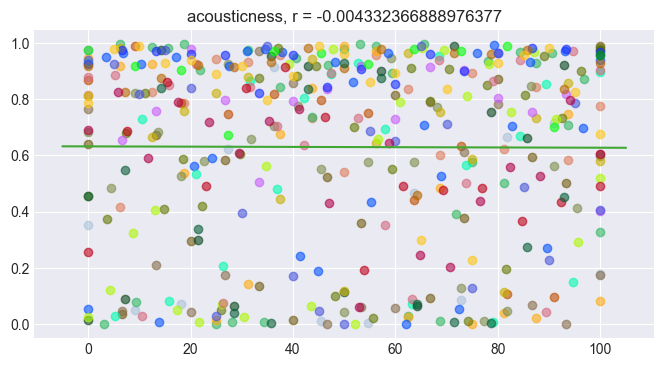

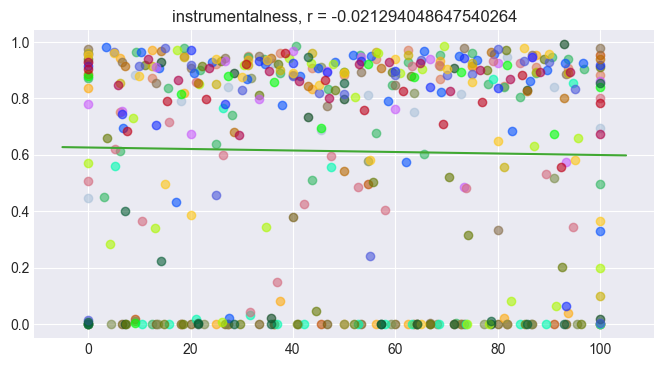

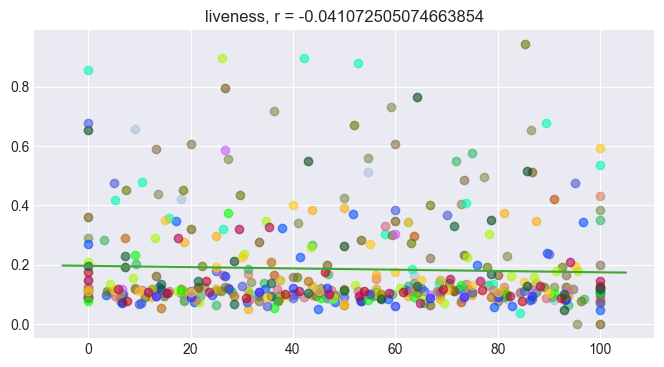

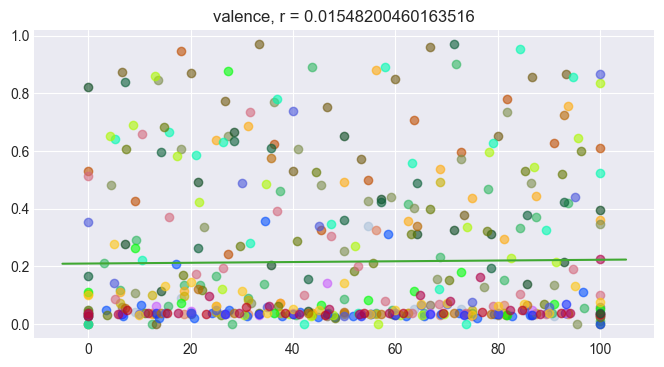

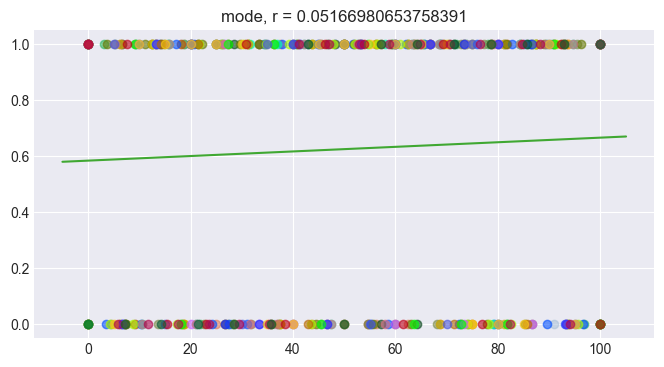

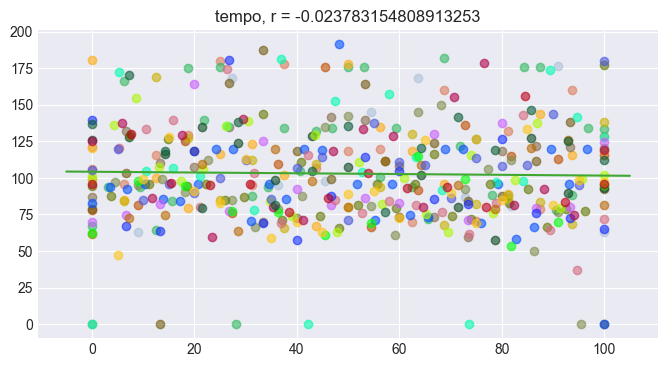

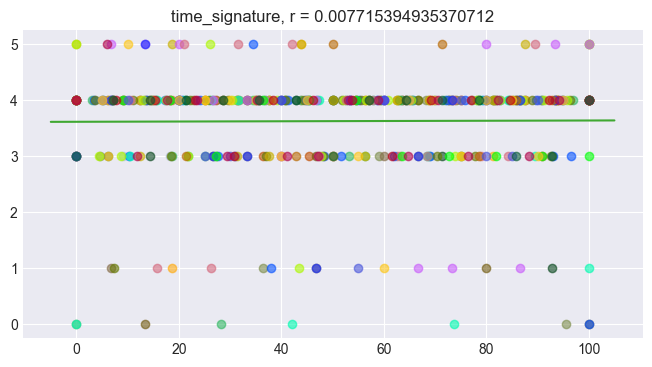

In [10]:
plot_multiple_playlists(top_30_movies)

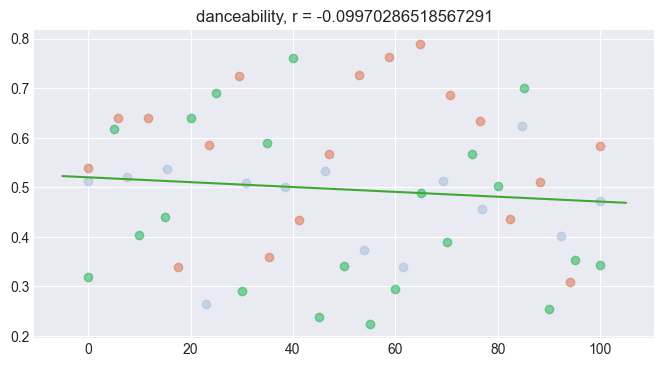

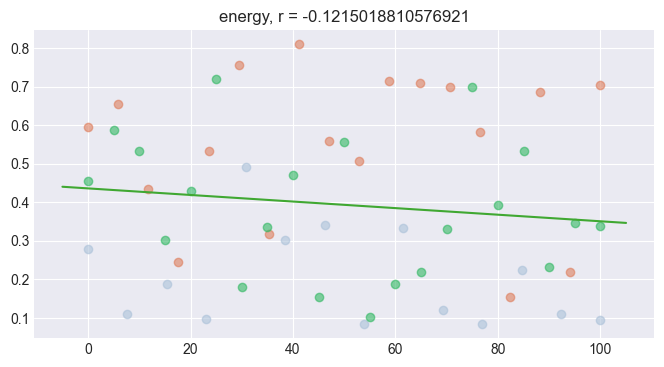

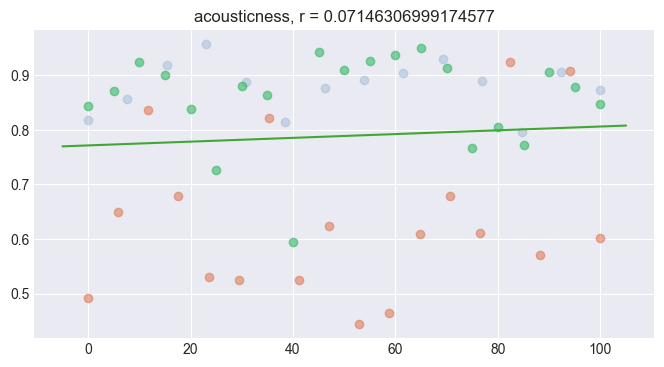

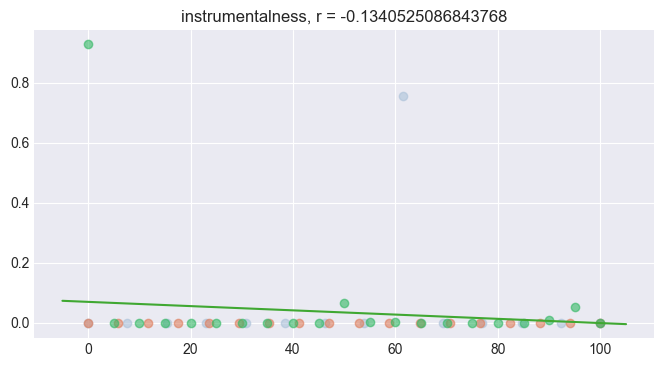

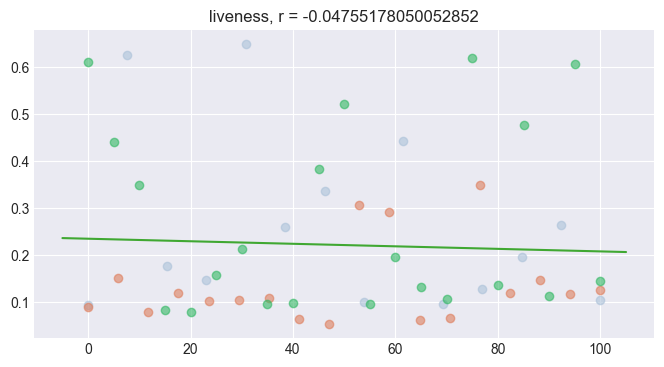

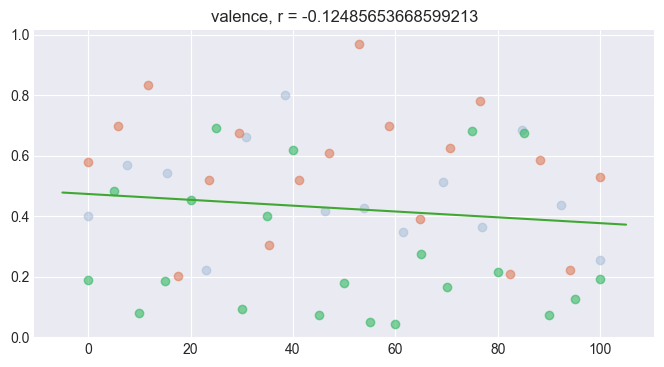

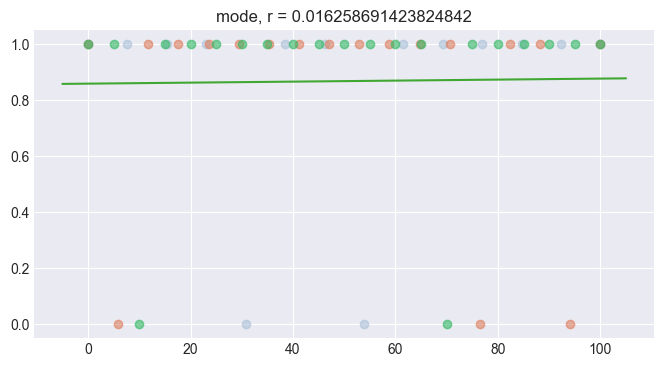

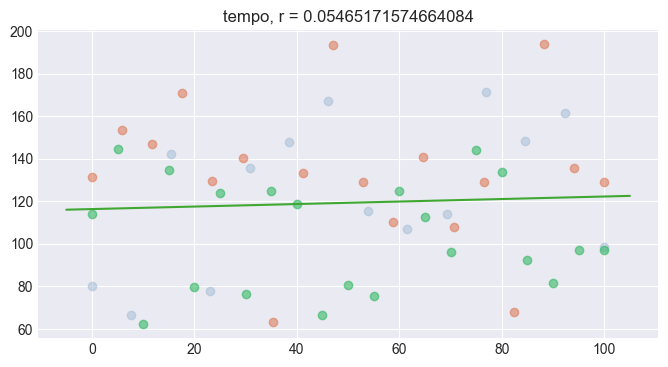

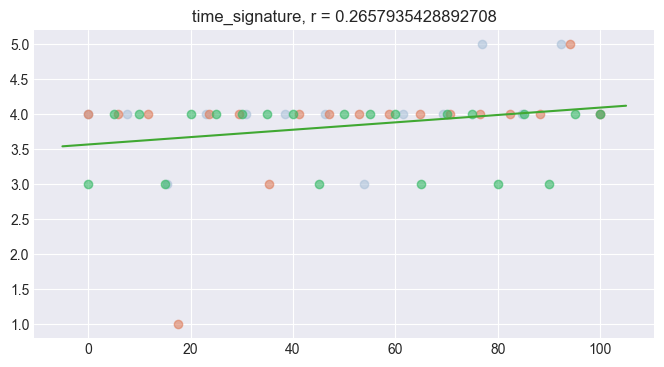

In [11]:
plot_multiple_playlists(musicals)

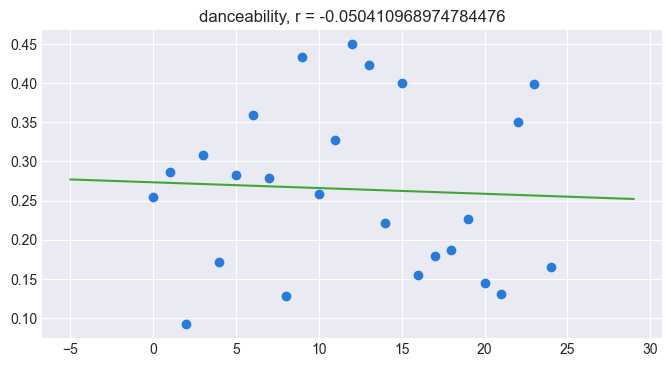

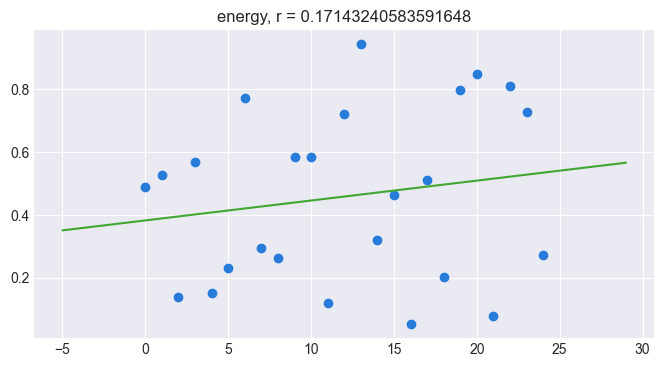

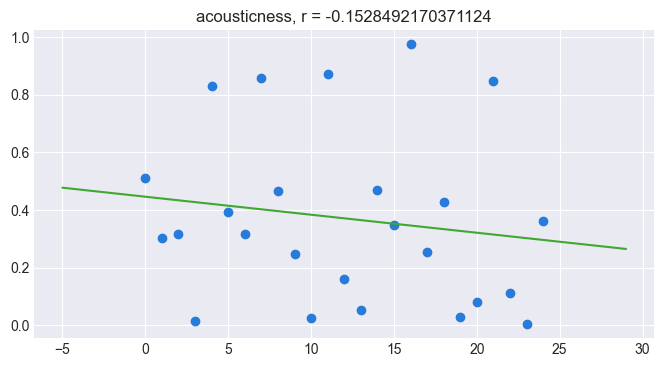

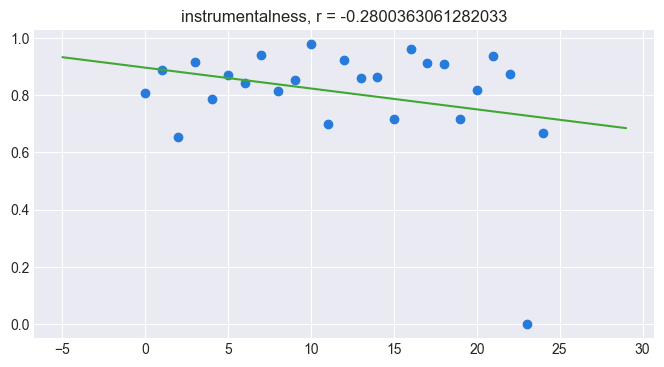

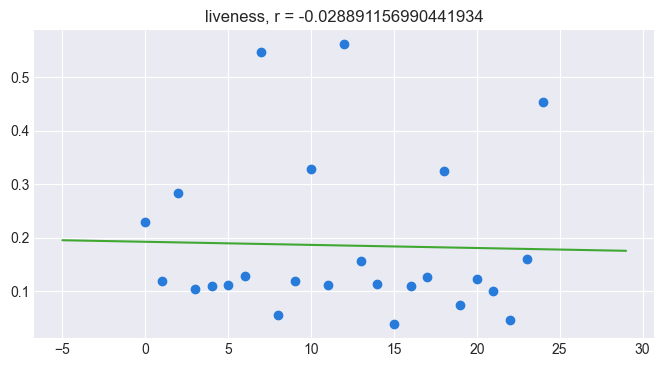

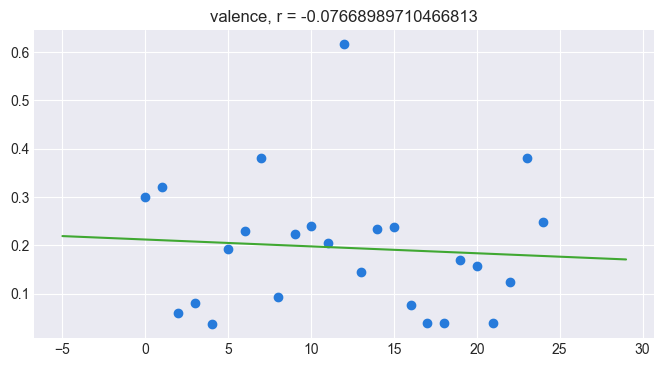

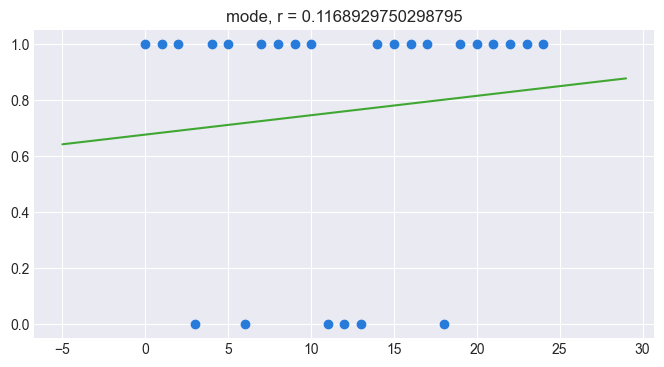

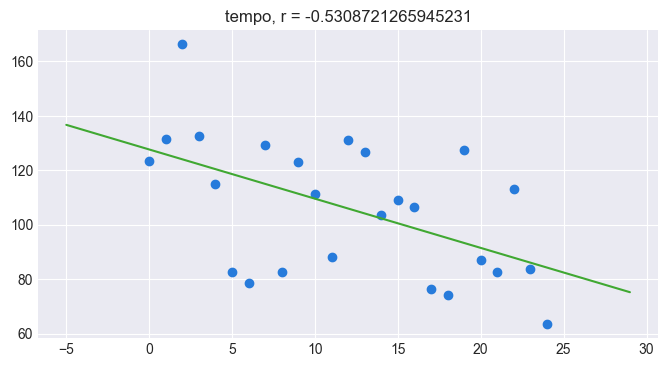

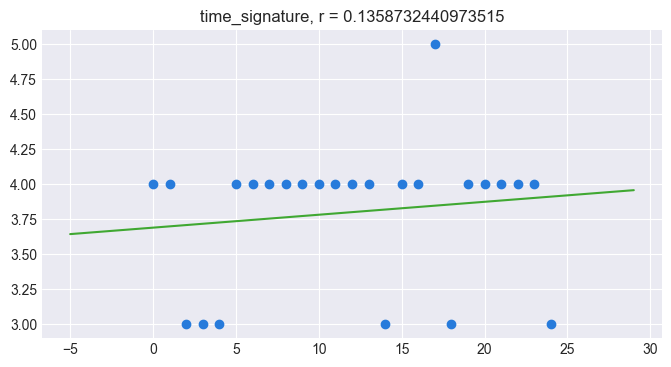

In [16]:
plot_for_playlist("HTTYD (1)")
# plot_for_playlist("HTTYD (2)")
# plot_for_playlist("HTTYD (3)")

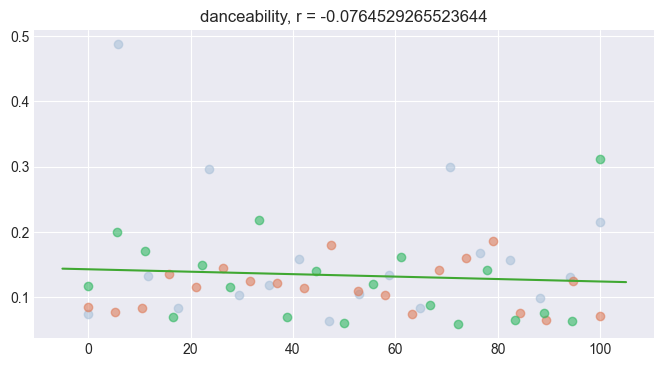

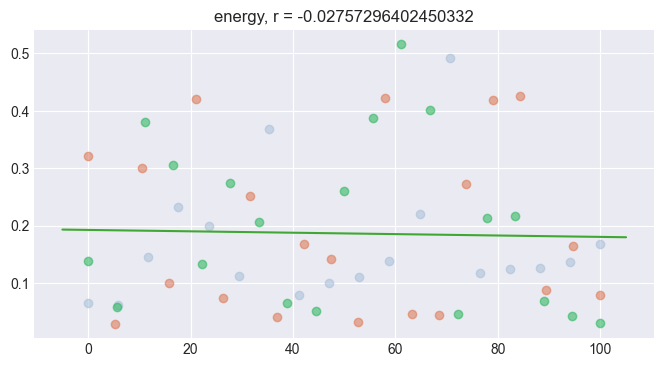

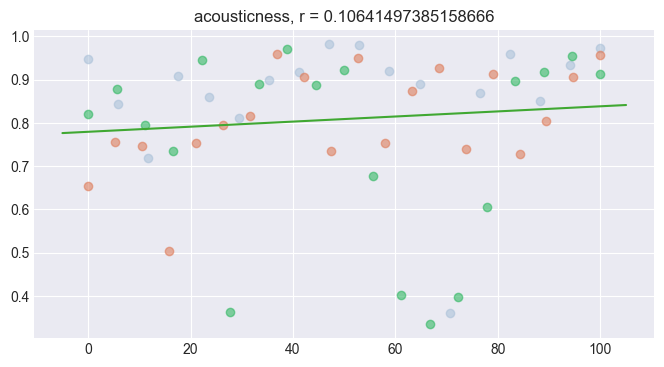

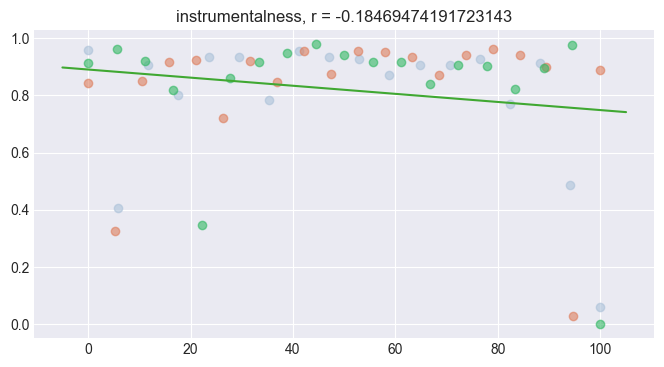

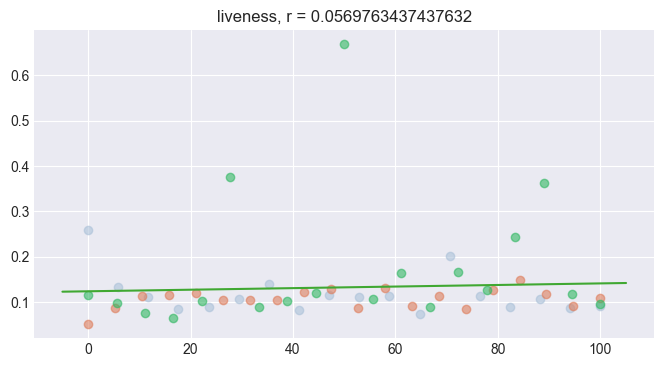

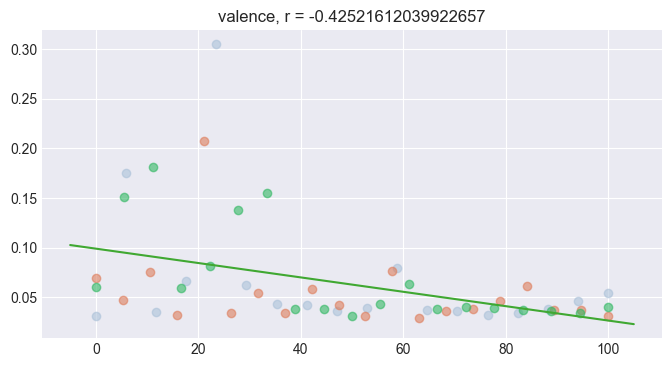

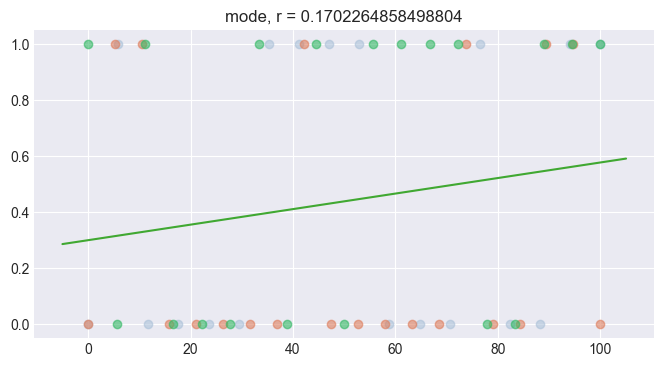

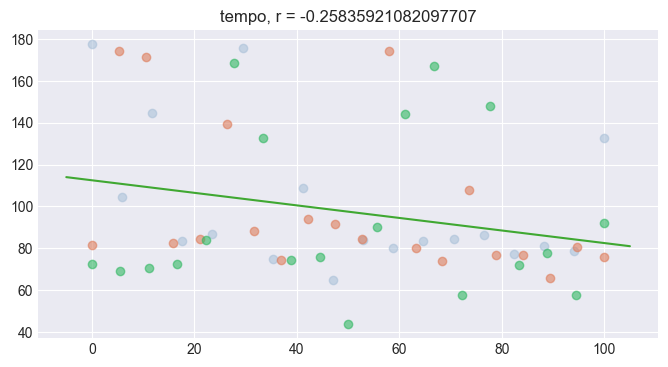

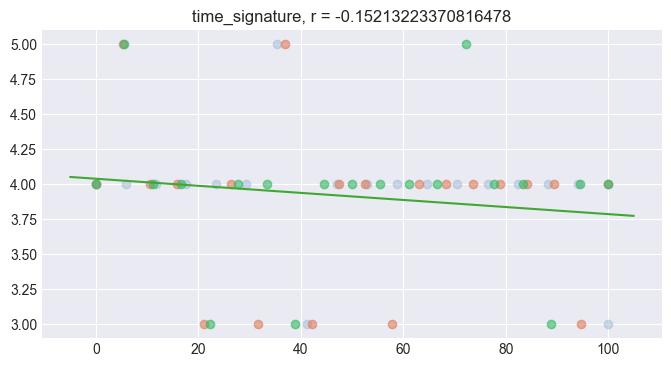

In [26]:
plot_multiple_playlists(lotr)

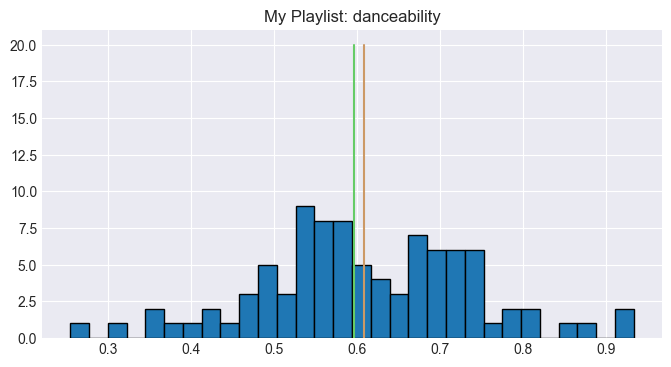

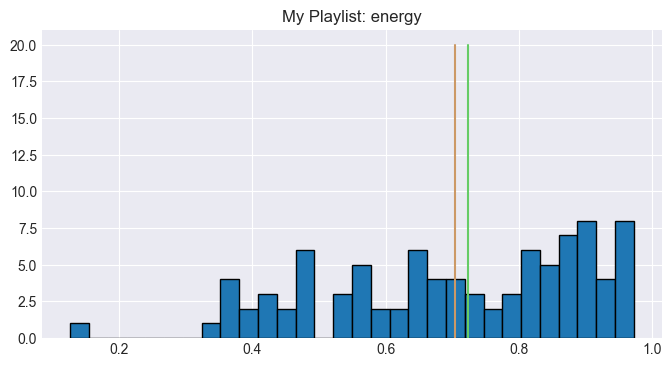

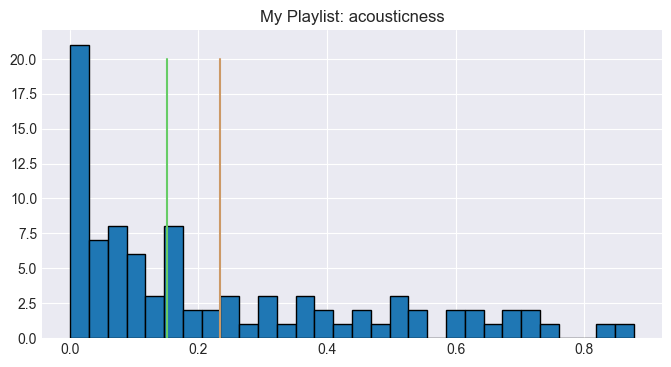

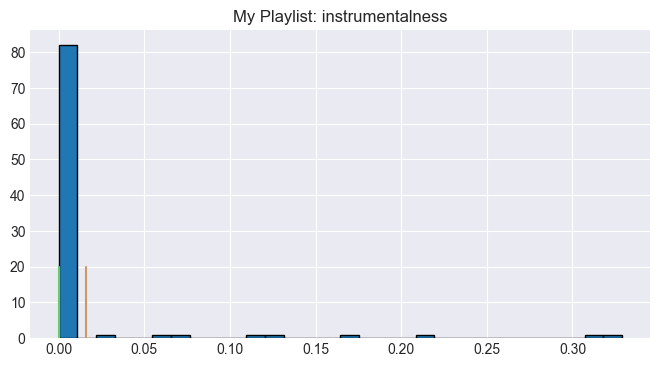

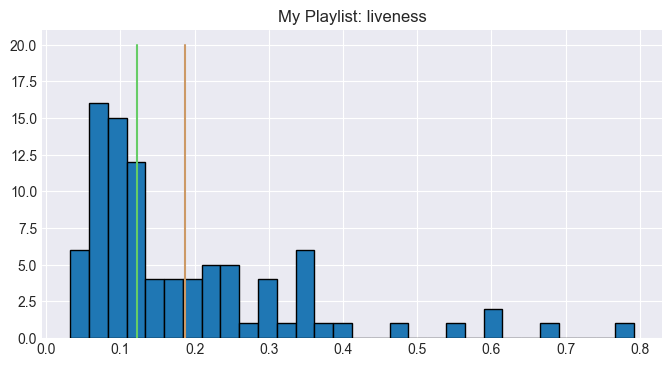

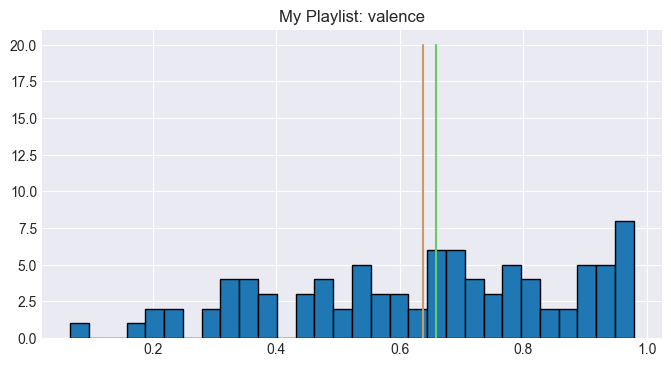

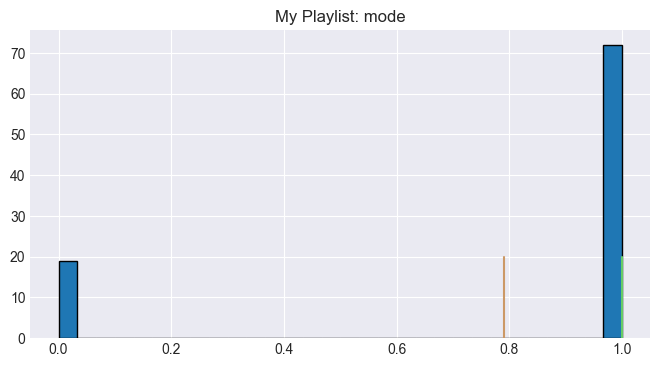

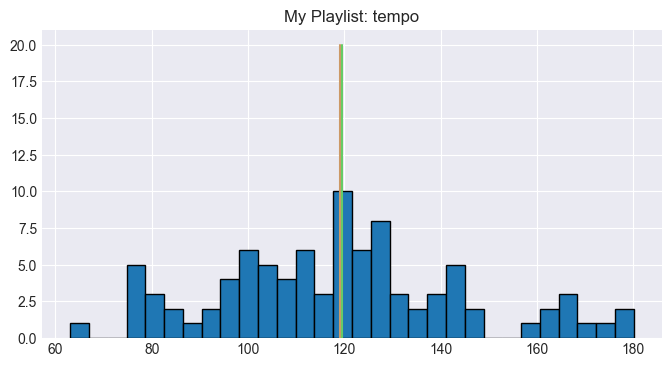

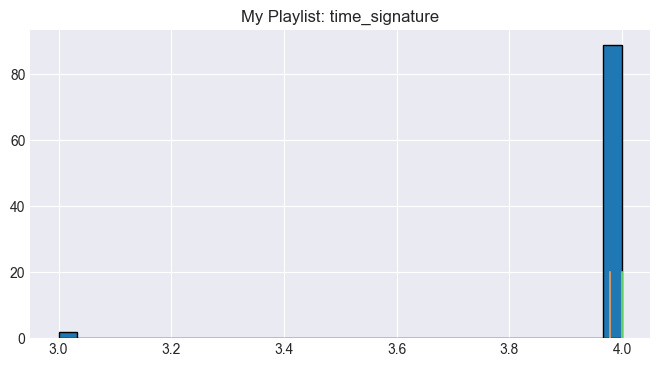

In [14]:
plot_hist_for_playlist("My Playlist")

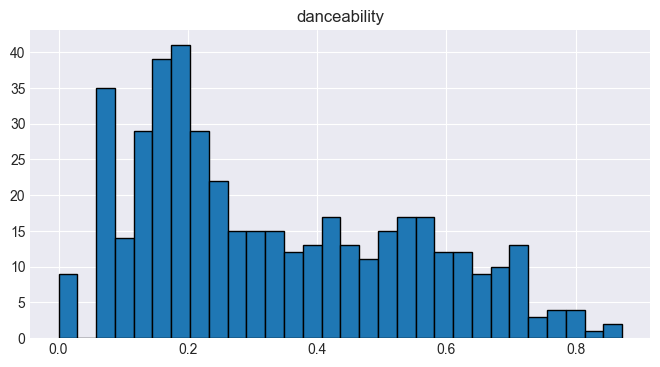

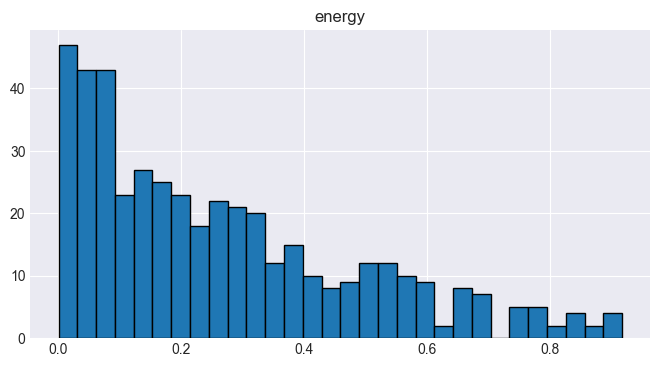

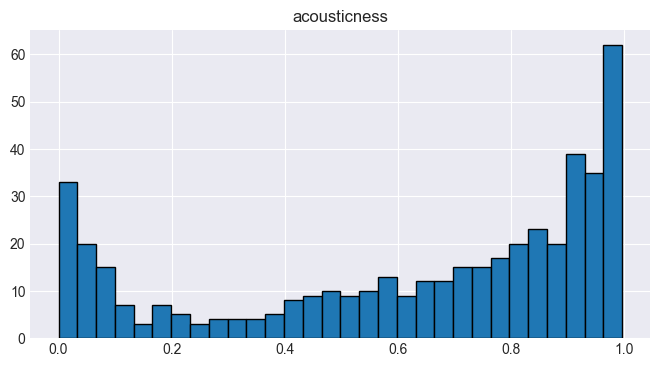

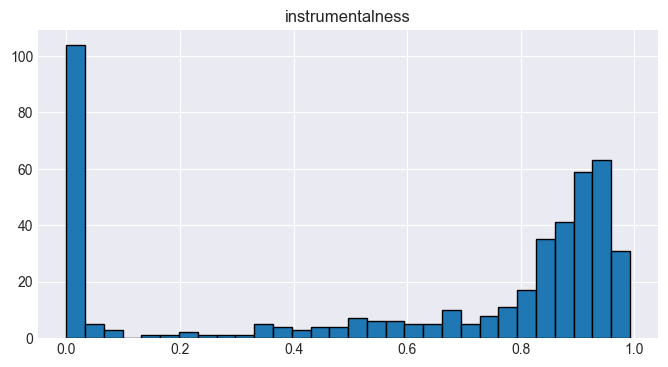

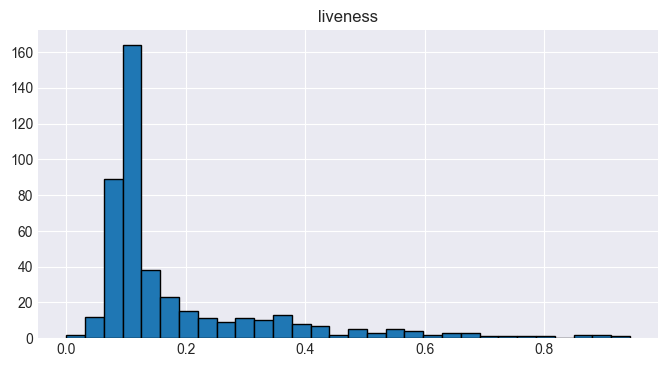

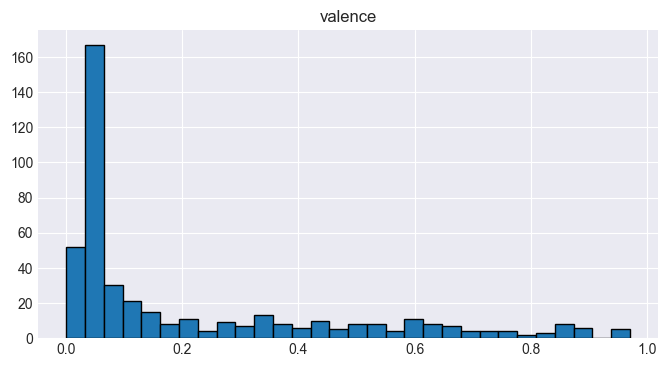

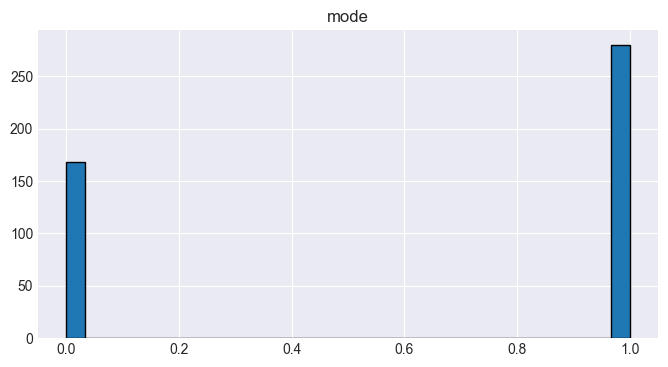

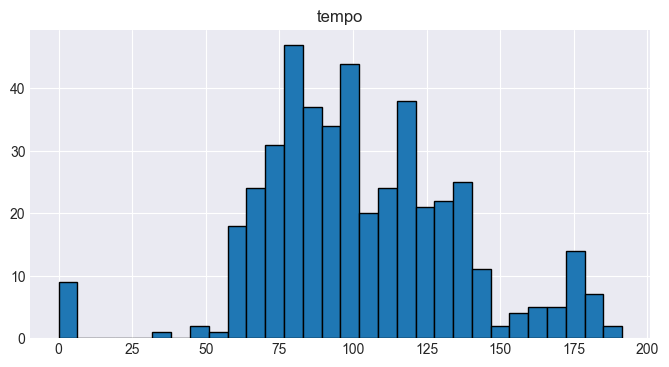

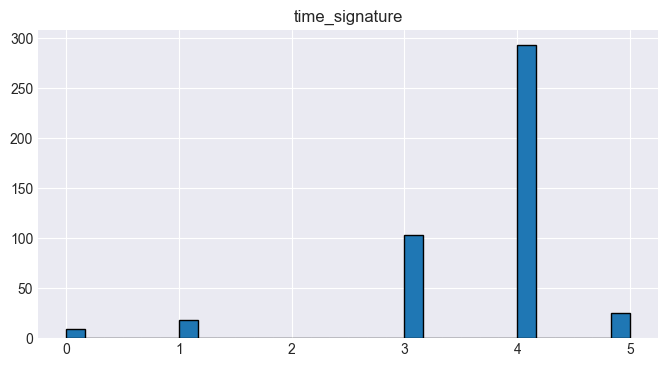

In [15]:
plot_hist_for_multiple_playlists(top_30_movies)

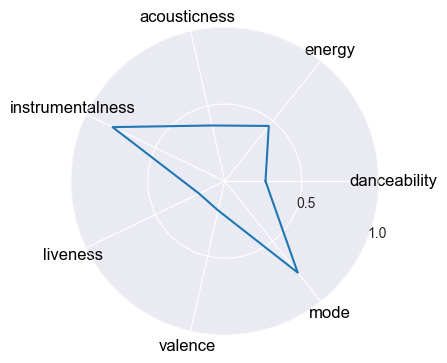

In [25]:
plot_radar_for_playlist("My Playlist")